In [1]:
import pandas as pd
import numpy as np

In [2]:
from preprocessingHelper import PreprocessingHelper

In [3]:
df=pd.read_excel("online_retail_II-230817-120704.xlsx")

In [4]:
df.columns=[col.upper().replace(" ","_") for col in df.columns]

In [5]:
df["CUSTOMER_ID"]=df["CUSTOMER_ID"].astype('object')

In [6]:
pp=PreprocessingHelper(dataframe=df)

## Data Analysis

In [7]:
pp.checkDf()

##################### Shape #####################
(525461, 8)
##################### Describe #####################
             count       mean         std       min   25%  50%    75%  \
QUANTITY  525461.0  10.337667  107.424110  -9600.00  1.00  3.0  10.00   
PRICE     525461.0   4.688834  146.126914 -53594.36  1.25  2.1   4.21   

               max  
QUANTITY  19152.00  
PRICE     25111.09  
##################### Info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   INVOICE      525461 non-null  object        
 1   STOCKCODE    525461 non-null  object        
 2   DESCRIPTION  522533 non-null  object        
 3   QUANTITY     525461 non-null  int64         
 4   INVOICEDATE  525461 non-null  datetime64[ns]
 5   PRICE        525461 non-null  float64       
 6   CUSTOMER_ID  417534 non-null  object  

In [8]:
df.loc[df["INVOICE"].apply(lambda x: len(str(x))>6)]

,INVOICE,STOCKCODE,DESCRIPTION,QUANTITY,INVOICEDATE,PRICE,CUSTOMER_ID,COUNTRY
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [9]:
df.loc[df["QUANTITY"]<0]

,INVOICE,STOCKCODE,DESCRIPTION,QUANTITY,INVOICEDATE,PRICE,CUSTOMER_ID,COUNTRY
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom
525235,538162,46000M,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [10]:
df.loc[df["PRICE"]<0]

,INVOICE,STOCKCODE,DESCRIPTION,QUANTITY,INVOICEDATE,PRICE,CUSTOMER_ID,COUNTRY
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [11]:
pp.missingValuesTable()

              Count     Ratio
DESCRIPTION    2928  0.005572
CUSTOMER_ID  107927  0.205395


In [12]:
df[(df["DESCRIPTION"]=="PAPER BUNTING WHITE LACE")&(df["QUANTITY"]<0)]

,INVOICE,STOCKCODE,DESCRIPTION,QUANTITY,INVOICEDATE,PRICE,CUSTOMER_ID,COUNTRY
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
472282,C533899,22087,PAPER BUNTING WHITE LACE,-6,2010-11-19 11:50:00,2.95,13993.0,United Kingdom
501438,C536164,22087,PAPER BUNTING WHITE LACE,-65,2010-11-30 12:09:00,2.90,15369.0,United Kingdom


In [13]:
cat_cols,cat_but_car,num_cols=pp.grabColNames()

Observations = 525461

Variables = 8

catorical columns = 0

catorical but cardinal columns = 5

numerical columns = 3

numerical but categorical columns = 0



In [14]:
for col in cat_but_car:
    pp.catSummary(col_name=col)

         INVOICE     Ratio
537434       675  0.128459
538071       652  0.124082
537638       601  0.114376
537237       597  0.113615
536876       593  0.112853
...          ...       ...
523981         1  0.000190
523984         1  0.000190
523985         1  0.000190
C523988        1  0.000190
C516462        1  0.000190

[28816 rows x 2 columns]
##########################################
        STOCKCODE     Ratio
85123A       3516  0.669127
22423        2221  0.422676
85099B       2057  0.391466
21212        1933  0.367867
21232        1843  0.350740
...           ...       ...
90005B          1  0.000190
90197C          1  0.000190
90080           1  0.000190
20904           1  0.000190
21120           1  0.000190

[4632 rows x 2 columns]
##########################################
                                     DESCRIPTION     Ratio
WHITE HANGING HEART T-LIGHT HOLDER          3549  0.675407
REGENCY CAKESTAND 3 TIER                    2212  0.420964
STRAWBERRY CERAMIC TRINKET

             count       mean        std     min   5%  10%  20%  30%  40%  \
QUANTITY  525461.0  10.337667  107.42411 -9600.0  1.0  1.0  1.0  1.0  2.0   

          50%  60%  70%   80%   90%   95%    99%      max  
QUANTITY  3.0  5.0  8.0  12.0  24.0  30.0  120.0  19152.0  



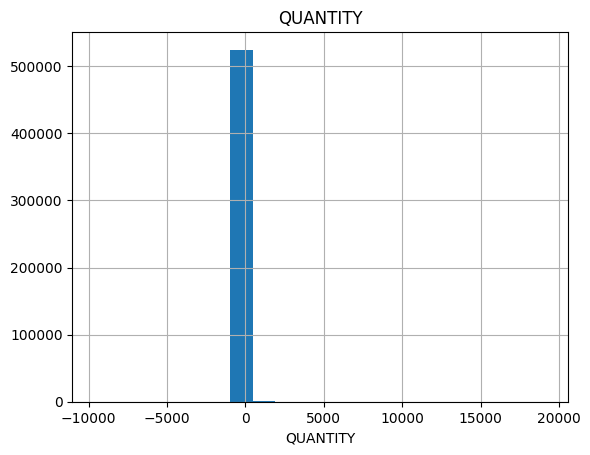

              count unique                 top freq               first  \
INVOICEDATE  525461  25296 2010-12-06 16:57:00  675 2009-12-01 07:45:00   

                           last  
INVOICEDATE 2010-12-09 20:01:00  



c:\Users\pc\Documents\GitHub\Miuul-Case\MachineLearning\homework3\preprocessingHelper.py:434: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(dataframe[[numerical_col]].describe(quantiles).T, end="\n\n")


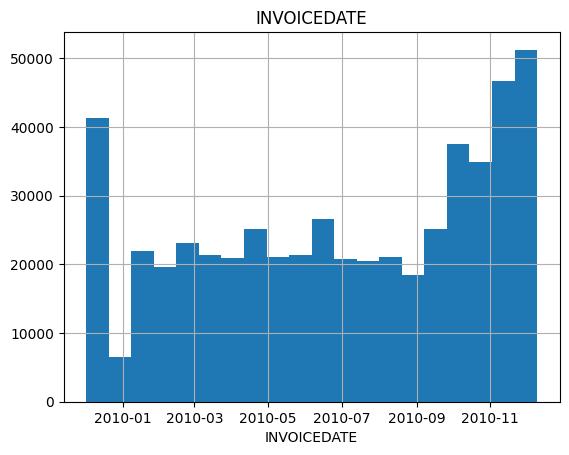

          count      mean         std       min    5%   10%   20%   30%   40%  \
PRICE  525461.0  4.688834  146.126914 -53594.36  0.42  0.65  1.25  1.28  1.66   

       50%   60%   70%   80%   90%    95%    99%       max  
PRICE  2.1  2.95  3.75  4.95  7.95  10.17  19.95  25111.09  



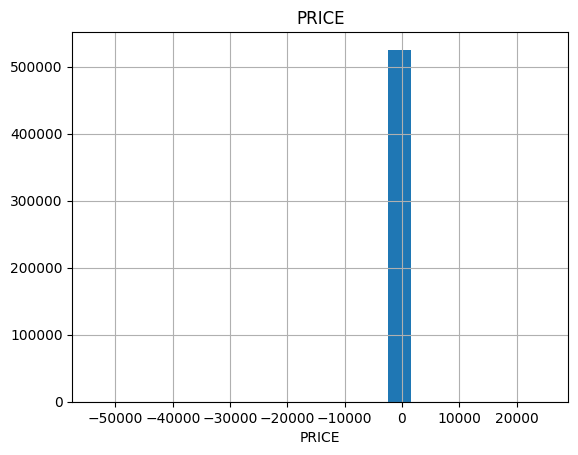

In [15]:
for col in num_cols:
    pp.numSummary(numerical_col=col,plot=True)

In [16]:
for col in num_cols:
    print(f"{col} {pp.checkOutlier(column_name=col,q1=0.05,q3=0.95)}")

QUANTITY True
INVOICEDATE False
PRICE True


## Feature Engineering

### Missing Values

In [17]:
missing_rows=df[df.isnull().any(axis=1)]

In [18]:
missing_rows[missing_rows["COUNTRY"]!="United Kingdom"]

,INVOICE,STOCKCODE,DESCRIPTION,QUANTITY,INVOICEDATE,PRICE,CUSTOMER_ID,COUNTRY
6376,C489881,21102,"CANDLE IN JAR COLLAGE , VANILLA",-31,2009-12-02 16:20:00,2.55,NaN,Nigeria
6377,C489881,72802A,ROSE SCENT CANDLE IN JEWELLED BOX,-16,2009-12-02 16:20:00,4.25,NaN,Nigeria
14481,490541,C2,CARRIAGE,1,2009-12-07 09:25:00,50.00,NaN,EIRE
14482,490541,85123A,WHITE HANGING HEART T-LIGHT HOLDER,96,2009-12-07 09:25:00,2.55,NaN,EIRE
27481,491702,84378,SET OF 3 HEART COOKIE CUTTERS,12,2009-12-13 13:53:00,1.25,NaN,EIRE
...,...,...,...,...,...,...,...,...
509297,536885,22867,HAND WARMER BIRD DESIGN,12,2010-12-03 11:42:00,2.10,NaN,EIRE
509298,536885,22865,HAND WARMER OWL DESIGN,12,2010-12-03 11:42:00,2.10,NaN,EIRE
509299,536885,22866,HAND WARMER SCOTTY DOG DESIGN,12,2010-12-03 11:42:00,2.10,NaN,EIRE
509300,536885,22312,OFFICE MUG WARMER POLKADOT,36,2010-12-03 11:42:00,2.95,NaN,EIRE


In [19]:
df=df.drop(df.loc[df["PRICE"]<0].index)

In [20]:
df[df["CUSTOMER_ID"].isnull()]

,INVOICE,STOCKCODE,DESCRIPTION,QUANTITY,INVOICEDATE,PRICE,CUSTOMER_ID,COUNTRY
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [21]:
df.drop(df[df["PRICE"]==0].index,inplace=True)

In [22]:
pp=PreprocessingHelper(dataframe=df)

In [23]:
df.loc[(df["CUSTOMER_ID"].isnull())].groupby(["INVOICE","COUNTRY"]).count()

,,STOCKCODE,DESCRIPTION,QUANTITY,INVOICEDATE,PRICE,CUSTOMER_ID
INVOICE,COUNTRY,,,,,,
489525,United Kingdom,2,2,2,2,2,0
489548,United Kingdom,55,55,55,55,55,0
489596,United Kingdom,1,1,1,1,1,0
489597,United Kingdom,502,502,502,502,502,0
489600,United Kingdom,31,31,31,31,31,0
...,...,...,...,...,...,...,...
C537630,United Kingdom,1,1,1,1,1,0
C537644,United Kingdom,1,1,1,1,1,0
C537647,United Kingdom,1,1,1,1,1,0


In [24]:
pp.missingValuesTable()

              Count     Ratio
CUSTOMER_ID  104268  0.199835


In [25]:
df.loc[(df["CUSTOMER_ID"].isnull()),"CUSTOMER_ID"]=df.loc[(df["CUSTOMER_ID"].isnull())].apply(
    lambda x: "N_"+str(x["INVOICE"])+"_"+"".join([col[0] if len(x["COUNTRY"].split())>=2 else col[0:2] for col in x["COUNTRY"].split()])
    ,axis=1)

In [26]:
pp.missingValuesTable()

Empty DataFrame
Columns: [Count, Ratio]
Index: []


In [27]:
df[(df["CUSTOMER_ID"].str.startswith("N",na=False))].head(10)

,INVOICE,STOCKCODE,DESCRIPTION,QUANTITY,INVOICEDATE,PRICE,CUSTOMER_ID,COUNTRY
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,N_489525_UK,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,N_489525_UK,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,N_489548_UK,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,N_489548_UK,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,N_489548_UK,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,N_489548_UK,United Kingdom
1059,489548,22131,FOOD CONTAINER SET 3 LOVE HEART,2,2009-12-01 12:32:00,1.95,N_489548_UK,United Kingdom
1060,489548,22079,RIBBON REEL HEARTS DESIGN,10,2009-12-01 12:32:00,1.65,N_489548_UK,United Kingdom
1061,489548,22138,BAKING SET 9 PIECE RETROSPOT,3,2009-12-01 12:32:00,4.95,N_489548_UK,United Kingdom
1062,489548,22147,FELTCRAFT BUTTERFLY HEARTS,2,2009-12-01 12:32:00,1.45,N_489548_UK,United Kingdom


### Outlier

In [28]:
for col in num_cols:
    print(f"{col} {pp.checkOutlier(column_name=col,q1=0.01,q3=0.99)}")

QUANTITY True
INVOICEDATE False
PRICE True


In [29]:
df[(df["QUANTITY"]<0)&(df["INVOICE"].apply(lambda x: len(str(x))>6))].sort_values(by="QUANTITY")

,INVOICE,STOCKCODE,DESCRIPTION,QUANTITY,INVOICEDATE,PRICE,CUSTOMER_ID,COUNTRY
507225,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
359669,C524235,21088,SET/6 FRUIT SALAD PAPER CUPS,-7128,2010-09-28 11:02:00,0.08,14277.0,France
359670,C524235,21096,SET/6 FRUIT SALAD PAPER PLATES,-7008,2010-09-28 11:02:00,0.13,14277.0,France
359630,C524235,16047,POP ART PEN CASE & PENS,-5184,2010-09-28 11:02:00,0.08,14277.0,France
359636,C524235,37340,MULTICOLOUR SPRING FLOWER MUG,-4992,2010-09-28 11:02:00,0.10,14277.0,France
...,...,...,...,...,...,...,...,...
180632,C506492,22361,GLASS JAR DAISY FRESH COTTON WOOL,-1,2010-04-30 10:52:00,2.95,15268.0,United Kingdom
180633,C506492,22364,GLASS JAR DIGESTIVE BISCUITS,-1,2010-04-30 10:52:00,2.95,15268.0,United Kingdom
180640,C506493,21217,RED SPOTTY ROUND CAKE TINS,-1,2010-04-30 10:52:00,9.95,17005.0,United Kingdom
180660,C506519,20712,JUMBO BAG WOODLAND ANIMALS,-1,2010-04-30 11:02:00,1.95,13461.0,United Kingdom


In [30]:
pp.replaceWithThresholds(column_name="PRICE",q1=0.01,q3=0.99)

In [31]:
pp.outlierThresholds(column_name="QUANTITY",q1=0.01,q3=0.99)

(-185.0, 303.0)

In [32]:
df[(df["QUANTITY"]<-185)].sort_values(by="QUANTITY")

,INVOICE,STOCKCODE,DESCRIPTION,QUANTITY,INVOICEDATE,PRICE,CUSTOMER_ID,COUNTRY
507225,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
359669,C524235,21088,SET/6 FRUIT SALAD PAPER CUPS,-7128,2010-09-28 11:02:00,0.08,14277.0,France
359670,C524235,21096,SET/6 FRUIT SALAD PAPER PLATES,-7008,2010-09-28 11:02:00,0.13,14277.0,France
359630,C524235,16047,POP ART PEN CASE & PENS,-5184,2010-09-28 11:02:00,0.08,14277.0,France
359636,C524235,37340,MULTICOLOUR SPRING FLOWER MUG,-4992,2010-09-28 11:02:00,0.10,14277.0,France
...,...,...,...,...,...,...,...,...
98458,C498595,85014C,BLUE/BROWN DOTS RUFFLED UMBRELLA,-192,2010-02-21 15:51:00,3.00,18102.0,United Kingdom
359650,C524235,84927E,FLOWERS TILE HOOK,-192,2010-09-28 11:02:00,0.08,14277.0,France
507795,C536812,22588,CARD HOLDER GINGHAM HEART,-192,2010-12-02 16:58:00,2.10,16546.0,United Kingdom
83395,C497158,D,Discount,-190,2010-02-05 16:27:00,2.35,18102.0,United Kingdom


In [33]:
pp.replaceWithThresholds(column_name="QUANTITY",q1=0.01,q3=0.99)

In [34]:
for col in num_cols:
    print(f"{col} {pp.checkOutlier(column_name=col,q1=0.01,q3=0.99)}")

QUANTITY False
INVOICEDATE False
PRICE False


### New Features

In [35]:
df.head()

,INVOICE,STOCKCODE,DESCRIPTION,QUANTITY,INVOICEDATE,PRICE,CUSTOMER_ID,COUNTRY
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [36]:
df["NEW_FLAG_CANCELED"]=0
df.loc[(df["INVOICE"].apply(lambda x: len(str(x))>6)),"NEW_FLAG_CANCELED"]=1

In [37]:
df['NEW_YEAR'] = pd.DatetimeIndex(df["INVOICEDATE"]).year

In [38]:
df['NEW_MONTH'] = pd.DatetimeIndex(df["INVOICEDATE"]).month

In [39]:
df["NEW_UNKNOWN_USER"]=0
df.loc[df["CUSTOMER_ID"].str.startswith("N",na=False),"NEW_UNKNOWN_USER"]=1

In [40]:
df["NEW_TO_ABROAD"]=0
df.loc[df["COUNTRY"]!="United Kingdom","NEW_TO_ABROAD"]=1

In [41]:
regular_customer=df.groupby("CUSTOMER_ID").agg({"INVOICE":"count"}).reset_index()[df.groupby("CUSTOMER_ID").agg({"INVOICE":"count"}).reset_index()["INVOICE"]>100]["CUSTOMER_ID"]

In [42]:
df["NEW_REGULAR_CUSTOMER"]=df["CUSTOMER_ID"].apply(lambda x:1 if x in regular_customer.values else 0)

In [43]:
df.head()

,INVOICE,STOCKCODE,DESCRIPTION,QUANTITY,INVOICEDATE,PRICE,CUSTOMER_ID,COUNTRY,NEW_FLAG_CANCELED,NEW_YEAR,NEW_MONTH,NEW_UNKNOWN_USER,NEW_TO_ABROAD,NEW_REGULAR_CUSTOMER
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0,2009,12,0,0,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,2009,12,0,0,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,2009,12,0,0,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,0,2009,12,0,0,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,0,2009,12,0,0,0


### Encoding

In [69]:
df=df.drop(["INVOICE","STOCKCODE","CUSTOMER_ID","DESCRIPTION","COUNTRY"],axis=1)

In [70]:
pp.dataframe=df

In [71]:
cat_cols,cat_but_car,num_cols=pp.grabColNames(cat_threshold=20)

Observations = 521771

Variables = 19

catorical columns = 16

catorical but cardinal columns = 0

numerical columns = 3

numerical but categorical columns = 16



In [48]:
df=pp.oneHotEncoder(cat_cols=cat_cols)

# Training

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
sc=MinMaxScaler((0,1))

In [53]:
for col in num_cols:
    df[col]=sc.fit_transform(df[[col]])

In [72]:
df.head()

,QUANTITY,INVOICEDATE,PRICE,NEW_FLAG_CANCELED_1,NEW_YEAR_2010,NEW_MONTH_2,NEW_MONTH_3,NEW_MONTH_4,NEW_MONTH_5,NEW_MONTH_6,NEW_MONTH_7,NEW_MONTH_8,NEW_MONTH_9,NEW_MONTH_10,NEW_MONTH_11,NEW_MONTH_12,NEW_UNKNOWN_USER_1,NEW_TO_ABROAD_1,NEW_REGULAR_CUSTOMER_1
0,0.403689,0.0,0.140557,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.403689,0.0,0.136512,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.403689,0.0,0.136512,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.477459,0.0,0.042456,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0.428279,0.0,0.025263,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [56]:
from sklearn.cluster import KMeans

In [74]:
ssd=[]
for k in range(1,30):
    kmeans=KMeans(n_clusters=k,n_init="auto").fit(df)
    ssd.append(kmeans.inertia_)

In [76]:
from matplotlib import pyplot as plt

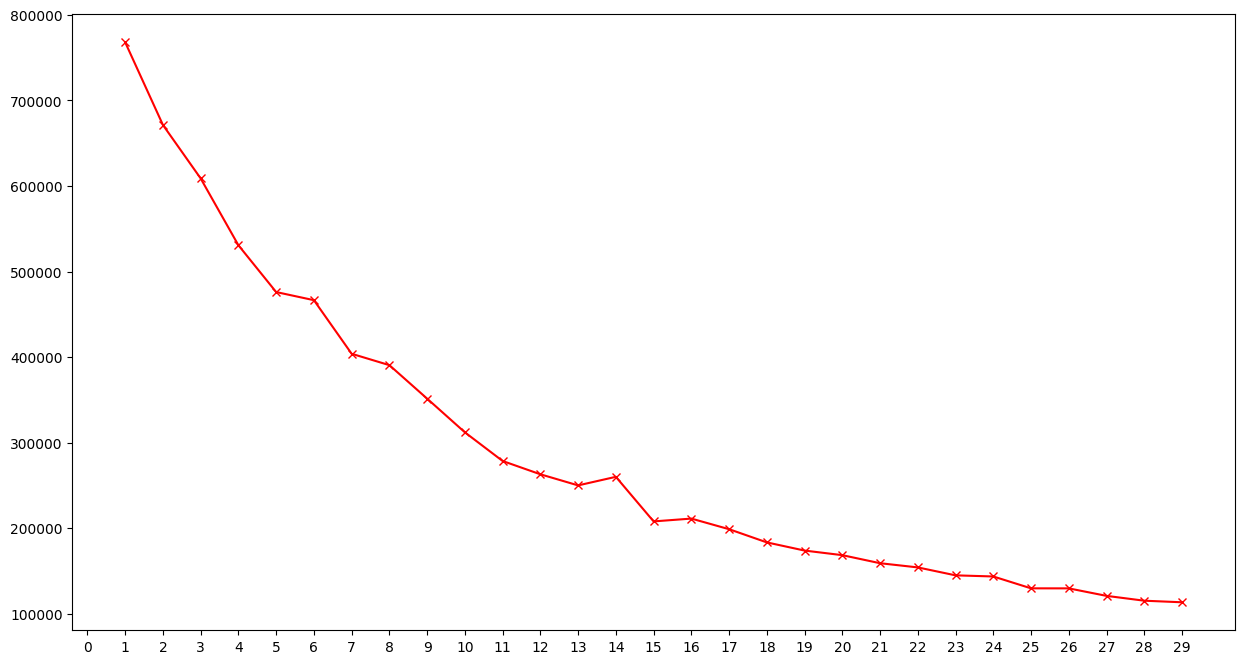

In [83]:
plt.figure(figsize=(15,8))
plt.xticks(range(0,30,1))
plt.plot(range(1,30),ssd,"rx-")
plt.show()

In [89]:
model=KMeans(n_clusters=15,n_init="auto")

In [90]:
model.fit(df)
labels = model.predict(df)

In [91]:
df["CLUSTER_LABEL"] = labels

In [92]:
df.head()

,QUANTITY,INVOICEDATE,PRICE,NEW_FLAG_CANCELED_1,NEW_YEAR_2010,NEW_MONTH_2,NEW_MONTH_3,NEW_MONTH_4,NEW_MONTH_5,NEW_MONTH_6,NEW_MONTH_7,NEW_MONTH_8,NEW_MONTH_9,NEW_MONTH_10,NEW_MONTH_11,NEW_MONTH_12,NEW_UNKNOWN_USER_1,NEW_TO_ABROAD_1,NEW_REGULAR_CUSTOMER_1,CLUSTER_LABEL
0,0.403689,0.0,0.140557,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2
1,0.403689,0.0,0.136512,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2
2,0.403689,0.0,0.136512,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2
3,0.477459,0.0,0.042456,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2
4,0.428279,0.0,0.025263,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2


In [93]:
df.to_csv("labeled_online_retail.csv")